In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spacy.lang.ru.stop_words import STOP_WORDS

In [37]:
df = pd.read_csv(r"../app/entites/fakenews_dataset/dataset.tsv", sep="	")

In [19]:
df.head() #пример данных

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1


In [20]:
df.info() #информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5758 non-null   object
 1   is_fake  5758 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.1+ KB


In [38]:
df["title"] = df["title"].apply(lambda x: str(x))
df

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1
...,...,...
5753,Эдди Чемберс получил сотрясение мозга в бою с ...,0
5754,Правительство застроит Россию нефтепродуктопро...,0
5755,«Мне стыдно перед дедом»: новый канцлер ФРГ об...,1
5756,Туркмения в декабре начнет поставки газа в Китай,0


In [21]:
STOP_WORDS

{'а',
 'авось',
 'ага',
 'агу',
 'аж',
 'ай',
 'али',
 'алло',
 'ау',
 'ах',
 'ая',
 'б',
 'бац',
 'без',
 'безусловно',
 'бишь',
 'благо',
 'благодаря',
 'ближайшие',
 'близко',
 'более',
 'больше',
 'будем',
 'будет',
 'будете',
 'будешь',
 'будто',
 'буду',
 'будут',
 'будучи',
 'будь',
 'будьте',
 'бы',
 'бывает',
 'бывала',
 'бывали',
 'бываю',
 'бывают',
 'был',
 'была',
 'были',
 'было',
 'бытует',
 'быть',
 'в',
 'вам',
 'вами',
 'вас',
 'ваш',
 'ваша',
 'ваше',
 'ваши',
 'вдали',
 'вдобавок',
 'вдруг',
 'ведь',
 'везде',
 'вернее',
 'весь',
 'взаимно',
 'взаправду',
 'видно',
 'вишь',
 'включая',
 'вместо',
 'внакладе',
 'вначале',
 'вне',
 'вниз',
 'внизу',
 'вновь',
 'во',
 'вовсе',
 'возможно',
 'воистину',
 'вокруг',
 'вон',
 'вообще',
 'вопреки',
 'вот',
 'вперекор',
 'вплоть',
 'вполне',
 'вправду',
 'вправе',
 'впрочем',
 'впрямь',
 'вресноту',
 'вроде',
 'вряд',
 'все',
 'всегда',
 'всего',
 'всей',
 'всем',
 'всеми',
 'всему',
 'всех',
 'всею',
 'всея',
 'всю',
 'всюд

In [41]:
for word in STOP_WORDS:
    df["title"] = df["title"].str.replace(r'\b' + word + r'\b', '', regex=True)

In [42]:
df

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт вмешат...,1
1,Агент Кокорина назвал езду встречке житейской...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело недоносительств...,1
...,...,...
5753,Эдди Чемберс получил сотрясение мозга бою Кл...,0
5754,Правительство застроит Россию нефтепродуктопро...,0
5755,«Мне стыдно дедом»: новый канцлер ФРГ обратил...,1
5756,Туркмения декабре начнет поставки газа Китай,0


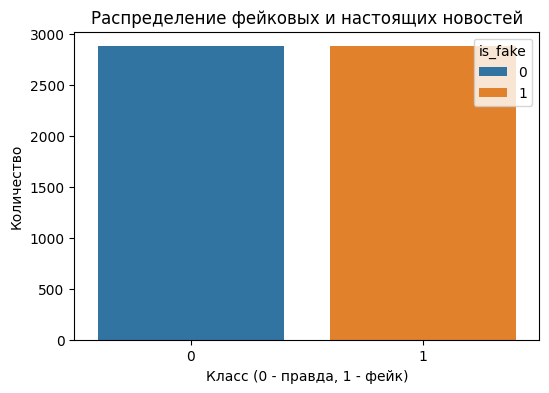

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['is_fake'], hue=df['is_fake'])
plt.title("Распределение фейковых и настоящих новостей")
plt.xlabel("Класс (0 - правда, 1 - фейк)")
plt.ylabel("Количество")
plt.show()
plt.savefig("Распределение фейковых и настоящих новостей.png")

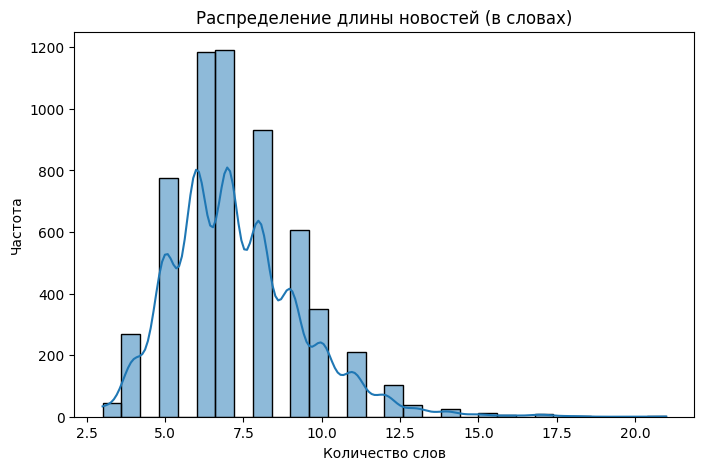

<Figure size 640x480 with 0 Axes>

In [44]:
df["text_length"] = df["title"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], bins=30, kde=True) 
plt.title("Распределение длины новостей (в словах)")
plt.xlabel("Количество слов")
plt.ylabel("Частота")
plt.show()
plt.savefig("Распределение длины новостей.png")

In [45]:
fake_texts = " ".join(df[df['is_fake'] == 1]["title"].astype(str))
real_texts = " ".join(df[df['is_fake'] == 0]["title"].astype(str))

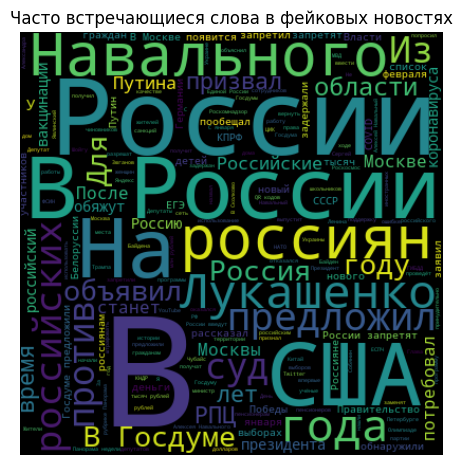

In [46]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wordcloud_fake = WordCloud(width=400, height=400, background_color="black").generate(fake_texts)
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Часто встречающиеся слова в фейковых новостях")
plt.savefig("Часто встречающиеся слова в фейковых новостях.png")

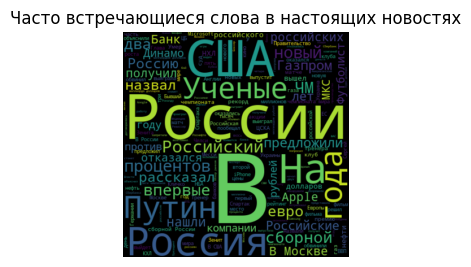

<Figure size 640x480 with 0 Axes>

In [47]:
plt.subplot(1,2,2)
wordcloud_real = WordCloud(width=400, height=400, background_color="black").generate(real_texts)
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Часто встречающиеся слова в настоящих новостях")
plt.show()
plt.savefig("Часто встречающиеся слова в настоящих новостях.png")